In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Пример 1
Найдем производные 1 и 2 порядка функции 
$$
\left\{
\begin{matrix}
x = \cos(t)\\
y = \sin(t)
\end{matrix}
\right.
$$

In [2]:
t = Symbol('t')
x = Cos(t)
y = Sin(t)
dx = diff(x, t)
dy =  diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display(dy_x, dy2_xx)

-cos(t)/sin(t)

-(sin(t)**2 + cos(t)**2)/sin(t)**3

Упростим выражение для второй производной, для первой не будем, поскольку нужно будет искать нули числителя и знаменателя.

In [3]:
dy2_xx = simplify(dy2_xx)
display(dy2_xx)

-1/sin(t)**3

### Пример 2.
Найдем нули производных первого и второго порядка для функции Примера 1, а также точки, в которых эти производные не существуют

In [4]:
dy_x_num, dy_x_den = fraction(dy_x)
dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
display('Первая производная, нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)
dy2_xx_num,dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
display('Вторая производная, нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

'Первая производная, нули числителя:'

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers))

'нули знаменателя:'

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

'Вторая производная, нули числителя:'

EmptySet

'нули знаменателя:'

Union(ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

### Пример 3. Точки экстремума
Найдем точки экстремума функции Примера 1 на интервале изменения параметра t от 0 до $2\pi$.

Объединим множества нулей первой производной и точек, в которой она не существует, получим множество критических точек.

Преобразуем множество критических точек в список и упорядочим его по возрастанию.

Вычислим значения производной в серединах отрезков между критическими точками.

По смене знаков при переходе через точку, в которой производная равна нулю, определим тип экстремума.

ВАЖНО: при смене знаков нужно учесть, что с ростом t переменная х может убывать, тогда вывод о типе экстремума противоположный тому, как для обычной функции!

ВНИМАНИЕ! Точки, в которых производная параметрической функции не существует - не точки экстремума!

In [5]:
crit_points = Union(dy_x_num_nul, dy_x_den_nul)
crit_points

Union(ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + 3*pi/2), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

Найдем теперь пересечение множества критических точек с интервалом $[0, 2\pi)$. Правую границу интервала не включаем (Interval.Ropen(0, 2*Pi)), поскольку параметрическая функция задана периодическими с периодом $2\pi$ функциями, поэтому при $t = 2\pi$ получится та же самая точка, что и при $t = 0$.

In [6]:
crit_points_interval = crit_points.intersection(Interval.Ropen(0, 2*Pi))
crit_points_interval

FiniteSet(0, pi, pi/2, 3*pi/2)

Используем сортировку для упорядочивания точек в списке.

In [7]:
crit_points_interval = list(crit_points_interval)
crit_points_interval.sort()
crit_points_interval

[0, pi/2, pi, 3*pi/2]

In [8]:
points = [-Pi/6] + [(item + crit_points_interval[i + 1])/2 for i, item in enumerate(crit_points_interval[:-1])] + [5*Pi/3]
points

[-pi/6, pi/4, 3*pi/4, 5*pi/4, 5*pi/3]

Отбираем точки максимума и точки минимума, перебираем все критические точки, чтобы правильно выбирать точки слева и справа для вычисления производной, но в точки экстремума включаем только нули числителя производной, причем минимум получается при смене знака с - на + при условии, что значение $x$ меняется с меньшего на большее или при смене знака с + на - при условии, что значение $x$ меняется с большего на меньшее, макисмум - аналогично.

In [9]:
max_arr=[]
min_arr=[]
for i, item in enumerate(crit_points_interval):
    if item in dy_x_num_nul:
        df_left = dy_x.subs(t, points[i])
        df_right = dy_x.subs(t, points[i + 1])
        x_left = float(x.subs(t, points[i]))
        x_right = float(x.subs(t, points[i + 1]))
        if df_left < 0 and df_right > 0 and x_left < x_right or df_left > 0 and df_right < 0 and x_left > x_right:
            min_arr.append(item)
        elif df_left < 0 and df_right > 0 and x_left > x_right or df_left > 0 and df_right < 0 and x_left < x_right:
            max_arr.append(item)    
display('максимум', max_arr, 'минимум', min_arr)

'максимум'

[pi/2]

'минимум'

[3*pi/2]

Посмотрим на графике:

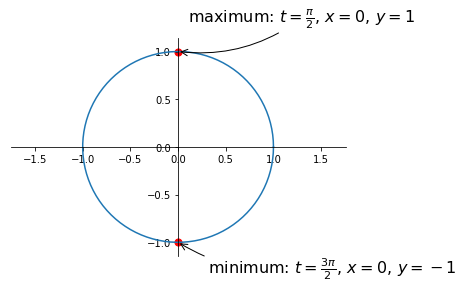

In [10]:
T = np.linspace(0, 2*np.pi, 100)
ax = plt.gca()  
ax.plot(np.cos(T), np.sin(T))
ax.axis('equal')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
for item in max_arr + min_arr:
    if item in max_arr:
        extr = ('maximum:', (10, 30))
    elif item in min_arr:
        extr = ('minimum:', (30, -30))
    x0 = x.subs(t, item)
    y0 = y.subs(t, item)
    ax.scatter([x0], [y0], 50, color='red')
    ax.annotate(extr[0] + r' $t = ' + latex(item) + ',\,x = ' + latex(x0) + ',\,y = ' + latex(y0)+r'$',
                xy=(x0, y0), xycoords='data',
                xytext=extr[1], textcoords='offset points', fontsize=16,
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"))    

### Пример 4. Точки перегиба
Найдем точки перегиба функции 
$$
\left\{
\begin{matrix}
x = \sin(t)\\
y = \sin(2t)
\end{matrix}
\right.
$$

Заметим, что функция периодическая с периодом $2\pi$, поэтому будем исследовать ее на полуоткрытом интервале $[0, 2\pi)$.

Вначале найдем вторую производную $y''_{xx}$, затем нули этой производной и точки, в которых производная не существует.

Вычислим значения второй производной в серединах отрезков между нулями второй производной и точками, в которых производная не существует.

По смене знаков при переходе через точку, в которой вторая производная равна нулю или не существует, определим, является ли эта точка точкой перегиба.

In [11]:
t = Symbol('t')
x = Sin(t)
y = Sin(2*t)
dx = diff(x, t)
dy = diff(y, t)
dy_x = dy/dx
dy2_xx = (dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3
display(dy2_xx)
dy2_xx_num, dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
dy2_xx_points = list((dy2_xx_num_nul.union(dy2_xx_den_nul)).intersect(Interval.Ropen(0, 2*Pi)))
dy2_xx_points.sort()
display(dy2_xx_points)

(2*sin(t)*cos(2*t) - 4*sin(2*t)*cos(t))/cos(t)**3

[0, pi/2, pi, 3*pi/2]

Составим список промежуточных точек для вычисления второй производной.

In [12]:
points = [-Pi/6] + [(item + crit_points_interval[i + 1])/2 for i, item in enumerate(dy2_xx_points[:-1])] + [5*Pi/3]
points

[-pi/6, pi/4, 3*pi/4, 5*pi/4, 5*pi/3]

In [13]:
inflection=[]
for i, item in enumerate(dy2_xx_points):
    if item in dy2_xx_num_nul:
        df_left = dy2_xx.subs(t, points[i])
        df_right = dy2_xx.subs(t, points[i + 1])
        if df_left*df_right < 0:
            inflection.append(item)      
display('перегиб ', inflection)

'перегиб '

[0, pi]

Данная точка является еще и точкой самопересечения, через нее проходит параметрически заданная кривая дважды, один раз при 
$t = 0$, а затем при $t = \pi$:

In [14]:
display(x.subs(t, 0) == x.subs(t, Pi) and y.subs(t, 0) == y.subs(t, Pi))

True

Отметим особые точки параметрически заданной функции, т.е. такие, что производная $x'_t$ или $y'_t$ равна нулю:

In [15]:
spec_points = list(solveset(dx).union(solveset(dy)).intersect(Interval.Ropen(0, 2*Pi)))
spec_points.sort()
spec_points

[pi/4, pi/2, 3*pi/4, 5*pi/4, 3*pi/2, 7*pi/4]

На графике функции отметим $P$ точка перегиба, $A_1$, $A_2$, ... - особые точки, $B_1$ и $B_2$, соответствующие 
$t = \pi/2$ и $3\pi/2$ - точки, в которых касательная к графику вертикальна. Построим вертикальные касательные красным пунктиром, горизонтальные - черным.   

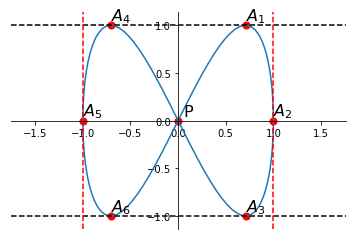

In [16]:
T = np.linspace(0, 2*np.pi, 100)
ax = plt.gca()  
ax.plot(np.sin(T), np.sin(2*T))
ax.axis('equal')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
x0 = x.subs(t, 0)
y0 = y.subs(t, 0)
ax.scatter([x0], [y0], 50, color='red')
ax.annotate('P', xy=(x0, y0), xycoords='data',
            xytext=(5, 5), textcoords='offset points', fontsize=16)    
for i, item in enumerate(spec_points):
    x0 = x.subs(t, item)
    y0 = y.subs(t, item)
    ax.scatter([x0], [y0], 50, color='red')
    ax.annotate(r' $A_' + str(i + 1) + r'$', xy=(x0, y0), xycoords='data',
                xytext=(-5, 5), textcoords='offset points', fontsize=16)
plt.axhline(y=1, color='black', linestyle='--')
plt.axhline(y=-1, color='black', linestyle='--')    
plt.axvline(x=1, color='red', linestyle='--')    
plt.axvline(x=-1, color='red', linestyle='--')  

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$. 

Если $\varphi(t_0) = \psi(t_0) = \infty$ и 
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$. 

### Пример 5.
Найти асимптоты функции
$$
\left\{
\begin{matrix}
x = \frac{1}{t}\\
y = e^t
\end{matrix}
\right.
$$
и изобразить на графике функцию и ее асимптоты.

Заметим, что $x \to \infty$ при $t \to 0$ и еще $y \to \infty$ при $t \to \infty$, так что вычислим пределы в нуле и положительной бесконечности. 

In [17]:
t = Symbol('t')
x = 1/t
y = sympy.exp(t)
display('t -> 0', limit(x, t, 0), (y, t, 0))
display('t -> +oo', limit(x, t, +sympy.oo), limit(y, t, +sympy.oo))

't -> 0'

oo

(exp(t), t, 0)

't -> +oo'

0

oo

Значит, кривая имеет горизонтальную асимптоту  $y = 1$ и вертикальную асимптоту $x = 0$. 

(-0.5, 5)

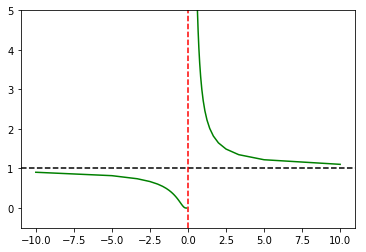

In [18]:
T1 = np.linspace(-10, -0.1, 100)
T2 = np.linspace(0.1, 10, 100)
for T in [T1, T2]:
    plt.plot(1/T, np.exp(T), color='green')
plt.axhline(y=1, color='black', linestyle='--')    
plt.axvline(x=0, color='red', linestyle='--') 
plt.ylim(-0.5, 5)

### Пример 6.
Найти асимптоты функции
$$
\left\{
\begin{matrix}
x = \sqrt{t+1}\\
y = \sqrt{t}
\end{matrix}
\right.
$$
и изобразить на графике функцию и ее асимптоты.

Заметим, что $x \to \infty$ и $y \to \infty$ при $t \to \infty$, так что вычислим на положительной бесконечности пределы 
$$
\lim_{t\to \infty} \frac{y}{x};\qquad \lim_{t\to \infty} [y - kx].
$$. 

In [19]:
t = Symbol('t')
x = sympy.sqrt(t + 1)
y = sympy.sqrt(t)
display(limit(y/x, t, +sympy.oo))

1

Получили $k = 1 < \infty$, вычисляем второй предел:

In [20]:
display(limit(y - x, t, +sympy.oo))

0

Следовательно, $y = x$ - наклонная асимптота.

(-0.5, 5)

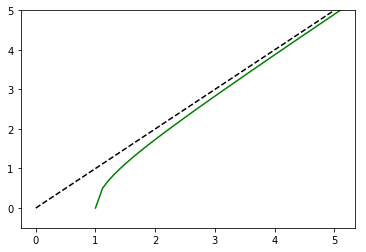

In [22]:
T = np.linspace(0, 25, 100)
plt.plot(np.sqrt(T + 1), np.sqrt(T), color='green')
plt.plot((0, 5), (0, 5), color='black', linestyle='--')    
plt.ylim(-0.5, 5)